In [4]:
%matplotlib inline
from svm_classifier import getClassifierAndVectorizer
import numpy as np
import glob, os, pickle
import math
import pickle
import collections
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from time import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


SVM with Vector Featues


In [5]:
clf, vectorizer = getClassifierAndVectorizer()

imported correctly


In [5]:
def extractor(n=10000):
    #n is number of opinions from each year"
    filename = "sentences_new/"
    datafiles = sorted(glob.glob(filename + "sent_????"))
    test_files = []
    year = []
    cases_per_year = []
    y = 1891
    case_names = []
    a = 0
    for d in datafiles:
        sentences = sorted(glob.glob(d + "/*.txt"))
        for i, sentence in enumerate(sentences):
            if i >= n:
                break
            myfile = open(sentence,'r') 
            data=myfile.read().replace('\n', '')
            test_files.append(data)
            year.append(y)

            #adding case no and judge no.
            case_n = ""
            flag = False
            for j in sentence:
                if j == "X":
                    flag = True
                if j == "_":
                    flag = False
                if j == ".":
                    flag = False
                if flag == True:
                    case_n += j
            case_names.append(case_n)

            myfile.close()
        cases_per_year.append(len(sentences))
        y += 1
    print(a)
    return test_files, year, cases_per_year, case_names

def loadDataset(pklPath):
    with open(pklPath, "rb") as pklFile:
        return np.array(pickle.load(pklFile, encoding="utf-8"))

In [7]:
#x_test = vectorizer.transform(data_to_predict)
clf, vectorizer = getClassifierAndVectorizer()
cases, year_of_case, cases_per_year, case_names = extractor()
x_test = vectorizer.transform(cases)
prediction = clf.predict(x_test)


imported correctly
0


imported correctly
0


In [9]:
cases, year_of_case, cases_per_year, case_names = extractor()

0


In [2]:
def extractorForPara(n=10000):
    #n is number of opinions from each year"
    filename = "paragraphs/"
    datafiles = sorted(glob.glob(filename + "para_????"))
    test_files = []

    for d in datafiles:
        paragraphs = sorted(glob.glob(d + "/*.pkl"))
        for i, para in enumerate(paragraphs):
            if i > n:
                break
            myfile = loadDataset(para)
            for j in myfile:
                if len(j) > 200:
                    test_files.append(j)

    return test_files

In [3]:
paragraphs = extractorForPara()
x_test_para = vectorizer.transform(paragraphs)
prediction_para = clf.predict(x_test_para)

NameError: name 'glob' is not defined

In [ ]:
#Rank paragraohs



proba = clf.decision_function(x_test_para)
temp_proba = proba.copy().tolist()

consPara = []
deonPara = []

for i in range(100):
    #range determines how many 'top' paragraphs to find
    max_val = max(temp_proba)
    max_index = temp_proba.index(max_val)

    min_val = min(temp_proba)
    min_index = temp_proba.index(min_val)

    consPara.append(min_index)
    deonPara.append(max_index)

    temp_proba[max_index], temp_proba[min_index] = 0, 0

print(len(consPara))
print("Strongly Consequentialist")
for i in range(10):
    print(paragraphs[consPara[i]])
    print('\n')
print("Strongly Deontologist")
for j in range(10):
    print(paragraphs[deonPara[j]])
    print('\n')

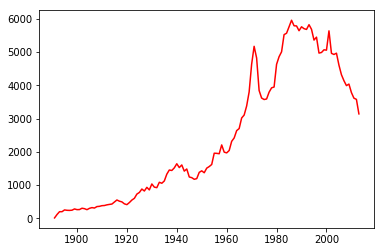

In [8]:
#for i, j in zip(attrib, prediction):
#        print('%r => %s' % (i, j))

#consPerYear = dict((yr,0) for yr in range(1891, 2014)) 
#deonPerYear = dict((yr,0) for yr in range(1891, 2014))
years = range(1891,2014)
consPerYear, deonPerYear = np.zeros(len(years)), np.zeros(len(years))
for i, j in zip(year_of_case, prediction):
    if j == "cons":
        consPerYear[i - 1891] += 1
    if j == "deon":
        deonPerYear[i - 1891] += 1
        
        
plt.plot(years, consPerYear, 'r')
#plt.plot(years, deonPerYear)
#plt.show()

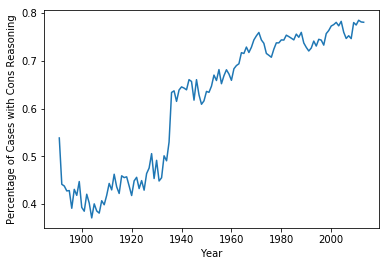

In [19]:
percentages = [] #consPerYear / cases_per_year
for i, j in zip(consPerYear, cases_per_year):
    if j < 10000:
        percentages.append(i/float(j))
    else:
        percentages.append(i/100)
plt.plot(years, percentages)
plt.xlabel("Year")
plt.ylabel("Percentage of Cases with Cons Reasoning")
plt.savefig("timeseries.png", dpi=300)

In [10]:
def MajVsDisExtractor():

    filename = "sentences_new/"
    datafiles = sorted(glob.glob(filename + "sent_????"))
    test_files = []
    maj_op = []
    dis_op = []

    d = datafiles[1922-1891]
    sentences = sorted(glob.glob(d + "/*.txt"))

    for i in range(len(sentences)):
        myfile = open(sentences[i],'r')
        data=myfile.read().replace('\n', '')
        if "MajOp" in sentences[i]:
            maj_op.append(data)
        elif "DisOp" in sentences[i]:
            dis_op.append(data)
    
        myfile.close()
    return maj_op, dis_op

In [ ]:
majOp, disOp = MajVsDisExtractor()
majTest = vectorizer.transform(majOp)
predictionMaj = clf.predict(majTest)
disTest = vectorizer.transform(disOp)
predictionDis = clf.predict(disTest)

majOp, disOp = MajVsDisExtractor()
majTest = vectorizer.transform(majOp)
predictionMaj = clf.predict(majTest)
disTest = vectorizer.transform(disOp)
predictionDis = clf.predict(disTest)

In [ ]:
percentMajCons = predictionMaj.tolist().count('cons') / len(majOp)
percentDisCons = predictionDis.tolist().count('cons') / len(disOp)
plt.bar("Majority", percentMajCons)
plt.bar("Dissenting", percentDisCons)
print(percentMajCons)
print(percentDisCons)
#1922

In [ ]:
#plots we want to make


#percentage of cons reasoning before and after econ seminar
#judge reasoning over time (do judges stay persistently deon/cons?)
#deon/cons vs educational instiution
#deon/cons vs location?
#deon/cons for topics (how do we identify topics)

In [11]:
def loadDataset(pklPath):
    with open(pklPath, "rb") as pklFile:
        return np.array(pickle.load(pklFile, encoding="utf-8"))

In [ ]:
def loadDataset(pklPath):
    with open(pklPath, "rb") as pklFile:
        return np.array(pickle.load(pklFile, encoding="utf-8"))

In [12]:
genis = loadDataset("/Users/liammeier/moral-reasoning/bb2genis.pkl")
md = pd.read_stata("/Users/liammeier/FilesTooBigForGithub/circuit_metadata_excerpt.dta") #md for metadata

In [ ]:
#print(metadata['songername'])
#print(df.keys())
#print(type(df))
print(md)

In [13]:
md.keys()
md = md.set_index('caseid')


In [14]:
c = md.loc['XB0OIFQNB5G0']
print(c)
a = md.loc['XB0OIFQNB5G0']['Author'].iloc[0]
print(a)
s = c['songername']
for i, name in enumerate(s):
    if a in name:
        correctName = name

print(correctName)

              Circuit  j date             songername  Affirmed  \
caseid                                                           
XB0OIFQNB5G0        8  2  NaT                              1.0   
XB0OIFQNB5G0        8  3  NaT  NELSON, SUSAN RICHARD       1.0   
XB0OIFQNB5G0        8  1  NaT                              1.0   

              AffirmedInPart  Reversed  ReversedInPart  Vacated  \
caseid                                                            
XB0OIFQNB5G0             0.0       0.0             0.0      0.0   
XB0OIFQNB5G0             0.0       0.0             0.0      0.0   
XB0OIFQNB5G0             0.0       0.0             0.0      0.0   

              VacatedInPart  Remanded  Dissenting1 Author  Writer  
caseid                                                             
XB0OIFQNB5G0            0.0       0.0          0.0            NaN  
XB0OIFQNB5G0            0.0       0.0          0.0            NaN  
XB0OIFQNB5G0            0.0       0.0          0.0           

In [ ]:
a.iloc[0]

In [15]:
case_songername = []
bad_cases = []
for case in case_names:
    try:
        c =  md.loc[case]
        author = c['Author'].iloc[0]
        songername = c['songername']
        for i, name in enumerate(songername):   
            if author in name:
                correctName = name
            #if author == '' and name != '':
            #    correctName = name
        case_songername.append(correctName)
    except:
        case_songername.append(-1)
        bad_cases.append(case)


In [ ]:
#print(case_names)
print(len(case_songername))
print(len(prediction))

In [16]:
bios = pd.read_stata("/Users/liammeier/moral-reasoning/JudgesBioReshaped_TOUSE.dta")

In [21]:
bios = bios.set_index('songername')

In [22]:
attributes = ['birthyear']
#print(case_songername[0])
j = bios.loc[case_songername[0]]
print(j.loc['birthyear'])

def makeAtrList(atr):
    listToReturn = []
    for name in case_songername:
        try:
            judge = bios.loc[name]
            listToReturn.append(judge.loc[atr])
        except:
            listToReturn.append(-1)
    return listToReturn

1952.0


In [ ]:
attributes = ['birthyear', 'presidentname', 'genderNew', 'nameofschool1', 'nameofschool2', 'nameofschool3', 'nameofschool4', 'nameofschool5',
              'raceorethnicity', 'partyaffiliationofpresident', 'placeofbirthstate']
atr = dict()    
for a in attributes:
    atr[a] = makeAtrList(a)

In [ ]:
#print(atr)
#for key, value in atr.items():
#    print(len(value))

In [ ]:
#Appointing President Party Affiliation
partyList = atr['partyaffiliationofpresident']
repCons = 0
demCons = 0
numRep = 0
numDem = 0
for i, j in zip(partyList, prediction):
    if i == "Democratic":
        numDem += 1
        if j == "cons":
            demCons +=1
    elif i == "Republican":
        numRep += 1
        if j == "cons":
            repCons +=1

plt.bar("Democratic", (demCons/numDem), color='b',)
plt.bar("Republican", (repCons/numRep), color='r')
plt.ylabel("Percentage Consequentialist")
plt.xlabel("Party of Appointing President")

In [ ]:
#By Gender
genderList = atr['genderNew']
femCons = 0
malCons = 0
numFem = 0
numMal = 0
for i, j in zip(genderList, prediction):
    if i == "M":
        numMal += 1
        if j == "cons":
            malCons +=1
    elif i == "F":
        numFem += 1
        if j == "cons":
            femCons +=1

plt.bar("Female", (femCons/numFem), color='pink',)
plt.bar("Male", (malCons/numMal), color='b')
plt.ylabel("Percentage Consequentialist")
plt.xlabel("Gender of Judge")

In [ ]:
school1 = atr['nameofschool1']
school2 = atr['nameofschool2']
school3 = atr['nameofschool3']
school4 = atr['nameofschool4']
school5 = atr['nameofschool5']

schoolSet = set(school1+school2+school3+school4+school5)
schoolCons = dict()
#schoolTotal = dict(schoolSet)
schoolTotal = dict.fromkeys(schoolSet, 0)
schoolCons = dict.fromkeys(schoolSet, 0)

#assuming last school attended is the law school

for a, b, c, d, e, pred in zip(school1, school2, school3, school4, school5, prediction):
    if e != '':
        schoolTotal[e] += 1
        if pred == 'cons':
            schoolCons[e] += 1
    elif d != '':
        schoolTotal[d] += 1
        if pred == 'cons':
            schoolCons[d] += 1
    elif c != '':
        schoolTotal[c] += 1
        if pred == 'cons':
            schoolCons[c] += 1
    elif b != '':
        schoolTotal[b] += 1
        if pred == 'cons':
            schoolCons[b] += 1
    elif a != '':
        schoolTotal[a] += 1
        if pred == 'cons':
            schoolCons[a] += 1
    else:
        pass

#for s in schoolSet:
#    schoolTotal[s] = school.count(s)
   
#for i, j in zip(school, prediction):
#    schoolCons[i] = 0
    
#for i, j in zip(school, prediction):
#    if j == 'cons':
#        schoolCons[i] += 1
total = sum(schoolTotal.values())
consTotal = sum(schoolCons.values())
overallPercentage = consTotal / total
percentDict = dict()
#come back and add n = ...
for i in schoolTotal.keys():
    if schoolTotal[i] > 1000:
        p = schoolCons[i]/schoolTotal[i]
        percentDict[i] = p / overallPercentage - 1


 
#x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
sorted_percentDict = sorted(percentDict.items(), key=operator.itemgetter(1))
for i in sorted_percentDict:
    print(i)

#print(sorted_percentDict)
        
#print(schoolTotal)
#print(schoolCons)
'''
plt.figure(figsize=(20,10))
for i in schoolTotal.keys():
    if schoolTotal[i] > 1000:
        plt.bar(i, schoolCons[i]/schoolTotal[i])
'''


In [ ]:
a = bios.loc['ADAMS, HENRY LEE']
print(a)
#for i, j in zip(a.keys(), a):
#    print(i, "-->" , j)

In [ ]:
#birthyear, nameofschool1, degree_law, raceorethnicity, placeofbirthstate, partyaffiliationofrenompres, genderNew, party
# political_party,
states = atr['placeofbirthstate']

stateSet = set(states)
stateTotal = dict.fromkeys(stateSet, 0)
stateCons = dict.fromkeys(stateSet, 0)

for state, pred in zip(states, prediction):
    if state != '':
        stateTotal[state] += 1
        if pred == 'cons':
            stateCons[state] += 1
            
statePercentages = {s:(stateCons[s]/stateTotal[s]) for s in stateSet}


In [ ]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

colors={}
statenames=[]
cmap = plt.cm.bwr # use 'hot' colormap
vmin = .46; vmax = 1 # set range.
#print(m.states_info)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        #change state name to stae initials
        state_initial = us_state_abbrev[statename]
        pop = statePercentages[state_initial]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        #colors[statename] = cmap(1.-(np.sqrt((pop-vmin)/(vmax-vmin))))[:3]
        colors[statename] = cmap((pop-vmin)/(vmax-vmin))
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

#plt.colorbar(m)
#plt.colorbar()
plt.title('Filling State Polygons by Consequentialist percentage')
#plt.show()